In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
NOISE_LEVEL = 0.2
N_SAMPLES = 1000

In [ ]:
# Utility function
def plot_abc(a, b, c, title):
  plt.suptitle(title)
  plt.subplot(221)
  plt.scatter(a,b, marker="+")
  plt.xlabel("a")
  plt.ylabel("b")
  plt.subplot(222)
  plt.scatter(a,c, marker="+")
  plt.xlabel("a")
  plt.ylabel("c")
  plt.subplot(223)
  plt.scatter(b,c, marker="+")
  plt.xlabel("b")
  plt.ylabel("c")
  plt.tight_layout()
  plt.show()

def do_regression(a, b, c):
  X = pd.DataFrame({'A': a, 'B': b})
  X = sm.add_constant(X, prepend=True)
  model = sm.OLS(c, X) # Ordinary Linear Regression
  results = model.fit()
  return results

# Chain dependancy

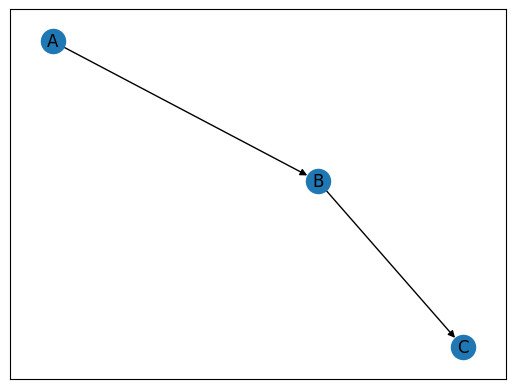

In [ ]:
# Draw graph
g = nx.DiGraph()
g.add_nodes_from("ABC")
g.add_edges_from([("A", "B"), ("B", "C")])
pos = nx.nx_pydot.graphviz_layout(g)
nx.draw_networkx(g, pos)
plt.show()

In [ ]:
# Generate random data
def generate_chain(samples, noise):
  a = np.random.randn(samples)
  b = a + noise*np.random.randn(samples)
  c = b + noise*np.random.randn(samples)
  return a, b, c


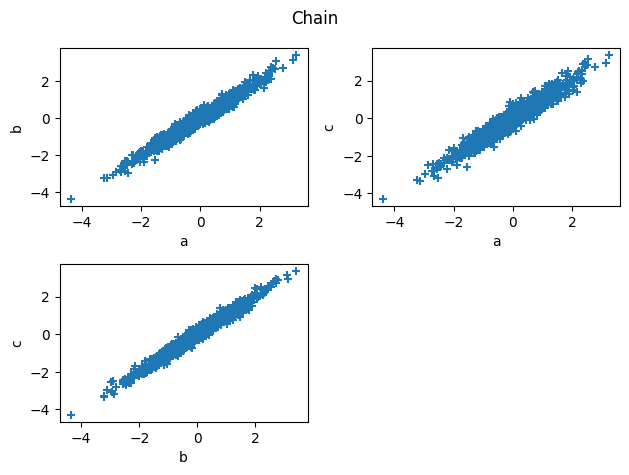

In [ ]:
# Plot all pairs
a, b, c = generate_chain(N_SAMPLES, NOISE_LEVEL)
plot_abc(a, b, c, "Chain")

In [ ]:
do_regression(a, b, c).summary()

# QUESTION 1 WHAT DOES THE COEFFICIENT TELL YOU

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.532e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:12:16   Log-Likelihood:                 229.18
No. Observations:                1000   AIC:                            -452.4
Df Residuals:                     997   BIC:                            -437.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0169      0.006     -2.764      0.006      -0.029      -0.005
A              0.0008      0.030      0.026      0.979      -0.058       0.060
B              1.0010      0.030     33.876      0.000       0.943       1.059
==============================================================================
Omnibus:                        4.373   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.536
Skew:                          -0.030   Prob(JB):                        0.171
Kurtosis:                       2.715   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Fork

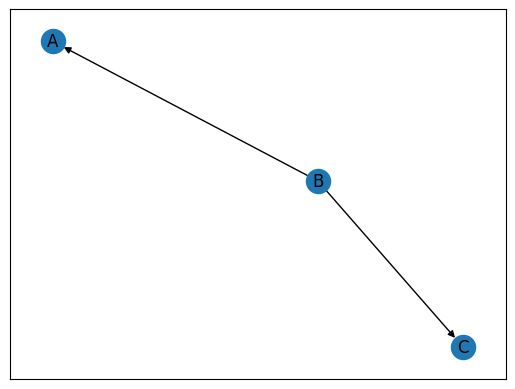

In [ ]:
# Draw graph
g = nx.DiGraph()
g.add_nodes_from("ABC")
g.add_edges_from([("B", "A"), ("B", "C")])
pos = nx.nx_pydot.graphviz_layout(g)
nx.draw_networkx(g, pos)
plt.show()

In [ ]:
# Generate random data
def generate_fork(samples, noise):
  b = np.random.randn(samples)
  a = b + noise*np.random.randn(samples)
  c = b + noise*np.random.randn(samples)
  return a, b, c

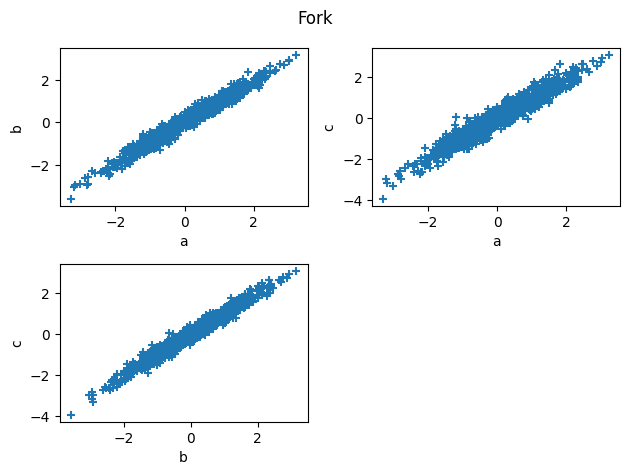

In [ ]:
# Plot all pairs
a, b, c = generate_fork(N_SAMPLES, NOISE_LEVEL)
plot_abc(a, b, c, "Fork")

In [ ]:
do_regression(a, b, c).summary()

# QUESTION 2 WHAT DOES THE COEFFICIENT TELL YOU

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.351e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:10:28   Log-Likelihood:                 190.24
No. Observations:                1000   AIC:                            -374.5
Df Residuals:                     997   BIC:                            -359.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0109      0.006     -1.714      0.087      -0.023       0.002
A             -0.0680      0.031     -2.206      0.028      -0.128      -0.008
B              1.0641      0.032     33.613      0.000       1.002       1.126
==============================================================================
Omnibus:                        1.182   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.216
Skew:                           0.034   Prob(JB):                        0.544
Kurtosis:                       2.844   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Collider

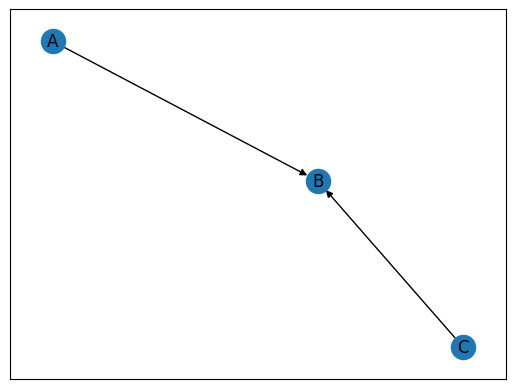

In [ ]:
# Draw graph
g = nx.DiGraph()
g.add_nodes_from("ABC")
g.add_edges_from([("A", "B"), ("C", "B")])
pos = nx.nx_pydot.graphviz_layout(g)
nx.draw_networkx(g, pos)
plt.show()

In [ ]:
# Generate random data
def generate_colliders(samples, noise):
  a = np.random.randn(samples)
  c = np.random.randn(samples)
  b = a + c + noise*np.random.randn(samples)
  return a, b, c

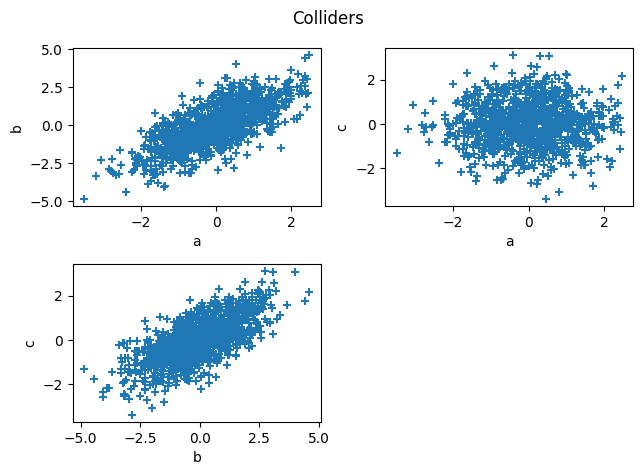

In [ ]:
# Plot all pairs
a, b, c = generate_colliders(N_SAMPLES, NOISE_LEVEL)
plot_abc(a, b, c, "Colliders")

In [ ]:
do_regression(a, b, c).summary()

# QUESTION 3 WHAT DOES THE COEFFICIENT TELL YOU

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:10:30   Log-Likelihood:                 157.09
No. Observations:                1000   AIC:                            -308.2
Df Residuals:                     997   BIC:                            -293.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.007      1.343      0.180      -0.004       0.022
A             -0.9670      0.009   -104.361      0.000      -0.985      -0.949
B              0.9625      0.007    147.898      0.000       0.950       0.975
==============================================================================
Omnibus:                        3.387   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.397
Skew:                          -0.118   Prob(JB):                        0.183
Kurtosis:                       2.840   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""